# Parte 3: Olivetti Faces

## Carga de datos

 1.	Seguirá trabajando con el dataset: Olivetti Faces. Como primer paso usted deberá cargar los datos y corroborar las dimensiones del dataset, el cual debe ser 400 x 4096

In [101]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
from sklearn.datasets import fetch_olivetti_faces
data, targets = fetch_olivetti_faces(return_X_y=True)

In [103]:
print("Existen {} imagenes en el dataset".format(len(data)))
print("Existen {} personas distintas en el dataset".format(len(np.unique(targets))))
print("Dimensiones de los datos: {}".format(data.shape))

Existen 400 imagenes en el dataset
Existen 40 personas distintas en el dataset
Dimensiones de los datos: (400, 4096)


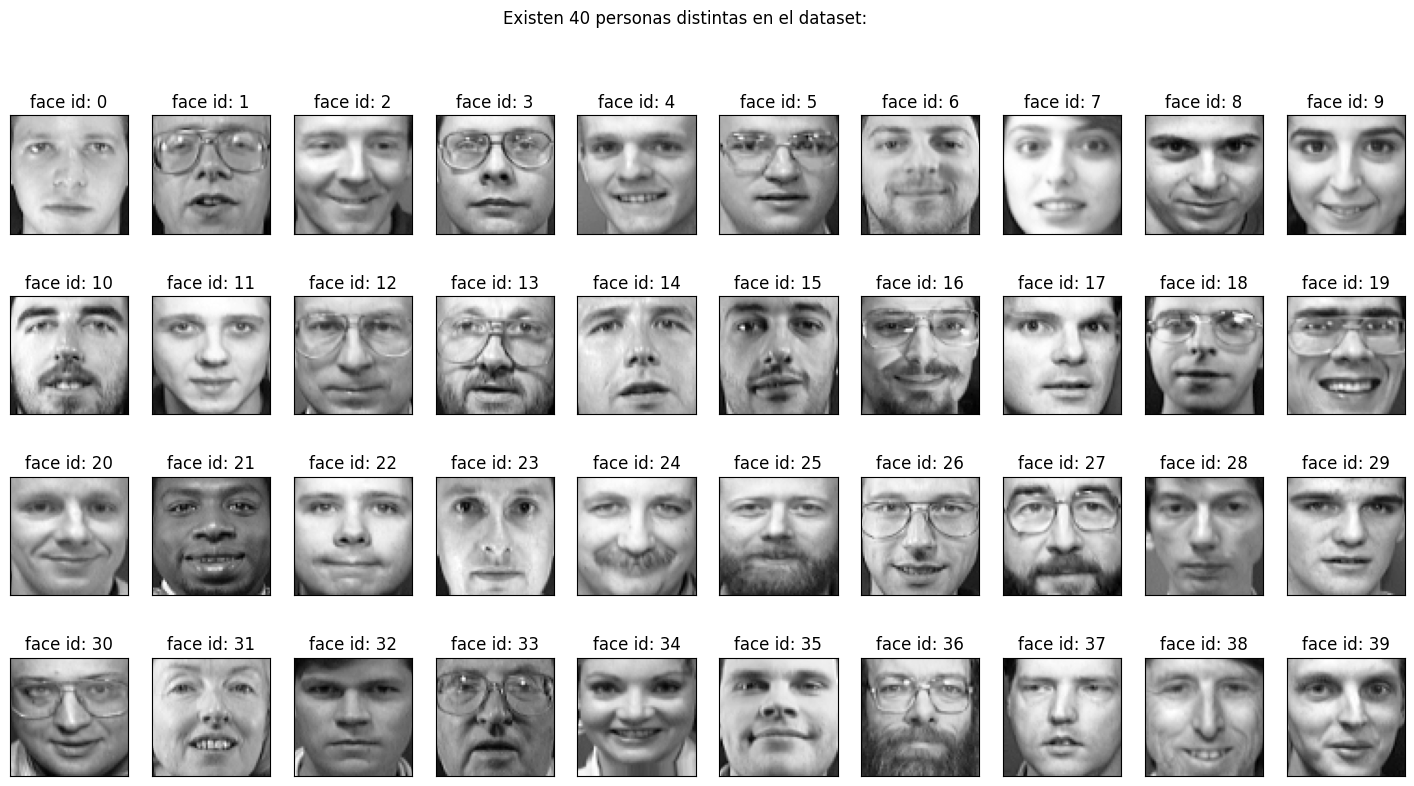

In [104]:
# Solo para efectos de observar las imágenes con las que trabajaremos, se muestra un ejemplo de cómo se ven las imágenes del dataset Olivetti Faces.
# Extraído de https://www.kaggle.com/code/serkanpeldek/face-recognition-on-olivetti-dataset

def show_40_distinct_people(images, unique_ids):
    # Creating 4X10 subplots in 18x9 figure size
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    # For easy iteration flattened 4X10 subplots matrix to a 40 array
    axarr = axarr.flatten()
    
    # Iterating over user ids
    for i, unique_id in enumerate(unique_ids):
        image_index = np.where(targets == unique_id)[0][0]  # Get the first image index for the unique_id
        image = images[image_index].reshape(64, 64, 1)  # Reshape the image to (64, 64, 1)
        axarr[i].imshow(image, cmap="gray")
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        axarr[i].set_title("face id: {}".format(unique_id))
    plt.suptitle("Existen 40 personas distintas en el dataset:")
    plt.show()

show_40_distinct_people(data, np.unique(targets))

## 2. KMeans y Cluster Jerarquico

2. Sabiendo que el número de clusters (personas) es 40, aplique K-Means y cluster jerárquico. Mediante el método del codo, identifique cuántos clusters le entrega cada uno de los algoritmos. ¿Cuál le da mejor resultado?


## K-Means

In [105]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [106]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator

# Convert the data to float and scale it to [0, 1] range (important for image data)
data_scaled = data.astype('float32') / 255.0

# Elbow method para K-Means
inertia_values_no_pca = []
max_clusters = 50  # Maximum number of clusters to try

# K-Means sin PCA
inertia_values_no_pca = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values_no_pca.append(kmeans.inertia_)
    
KL_KMeans_no_pca = KneeLocator(range(1,max_clusters + 1), inertia_values_no_pca, curve='convex', direction='decreasing')



c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

In [116]:
# Hierarchical Clustering without PCA
linked_no_pca = linkage(data_scaled, method='ward')
distances_no_pca = linked_no_pca[:, 2]

# Calculate the first derivative of the distances
differences_no_pca = np.diff(distances_no_pca)

# Find the number of clusters using KneeLocator for Hierarchical Clustering without PCA
kneedle_no_pca = KneeLocator(range(2, len(distances_no_pca) + 1), differences_no_pca, curve='convex', direction='decreasing')
optimal_clusters_no_pca = kneedle_no_pca.elbow

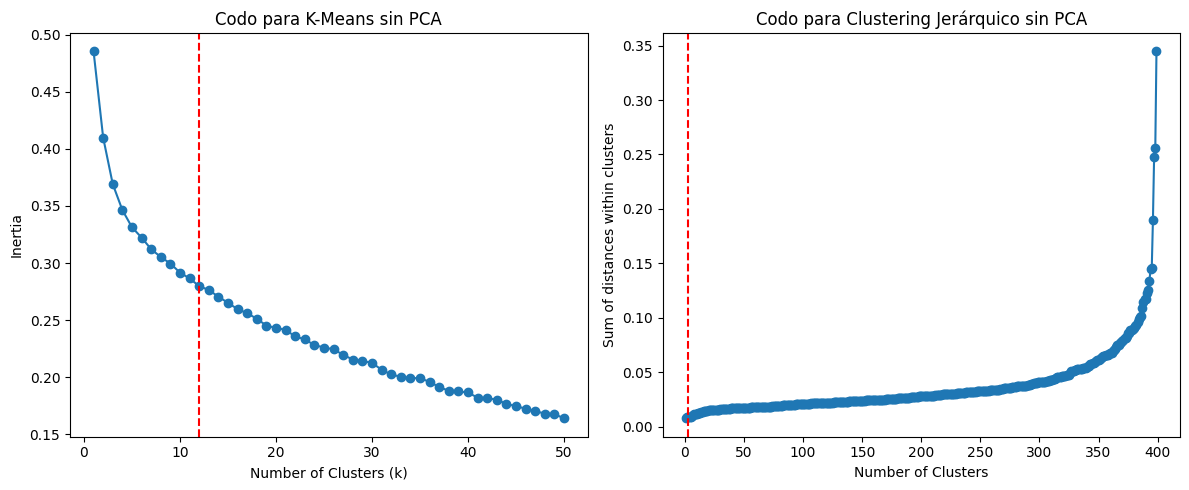

K-Means elbow 		 k =  12
Hier. Clustering elbow 	 k =  3


In [117]:
# Plotting the Elbow graphs for both algorithms (without PCA)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), inertia_values_no_pca, marker='o')
plt.axvline(x=KL_KMeans_no_pca.elbow, color='red', linestyle='--', label='Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Codo para K-Means sin PCA')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(distances_no_pca) + 1), distances_no_pca, marker='o')
plt.axvline(x=optimal_clusters_no_pca, color='red', linestyle='--', label='Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of distances within clusters')
plt.title('Codo para Clustering Jerárquico sin PCA')

plt.tight_layout()
plt.show()

print("K-Means elbow \t\t k = ", KL_KMeans_no_pca.elbow)
print("Hier. Clustering elbow \t k = ", optimal_clusters_no_pca)

Dendrograma para Hierarchical Clustering

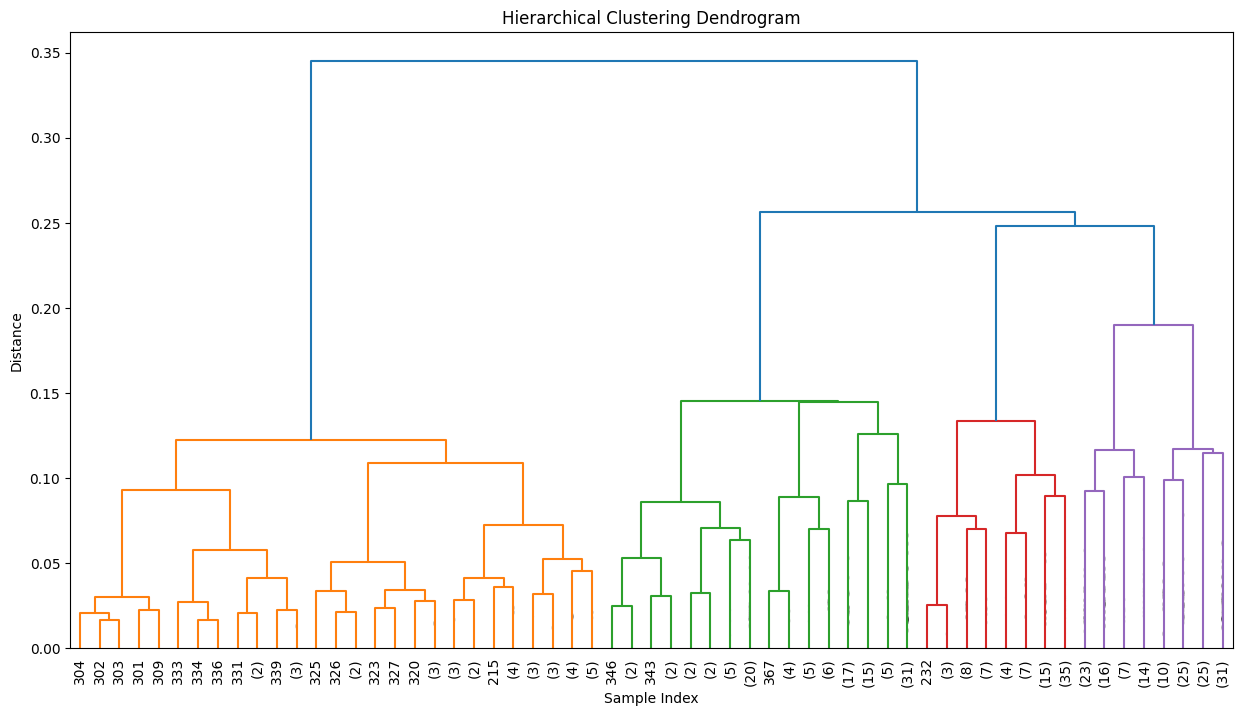

In [109]:
# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked_no_pca, truncate_mode='level', p=5, show_contracted=True, leaf_font_size=10)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### ¿Cual da el mejor resultado?

- Deberiamos comparar el error que entrega cada óptimo

## PCA
 3. Ahora aplique PCA al dataset. Quédese con un número de componentes principales tal que pueda capturar el 90% de la varianza explicada . ¿Cuántos componentes principales son?


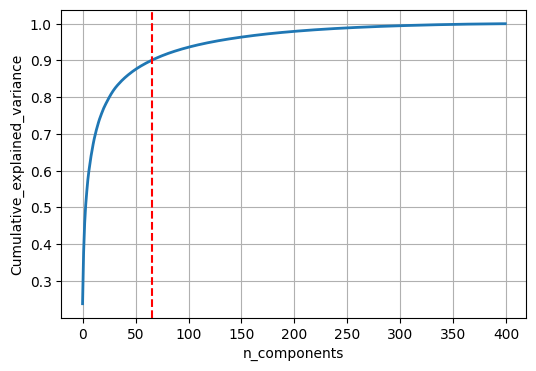

Number of components capturing 90% of variance: 66


In [110]:
from sklearn.decomposition import PCA

# Aplicamos PCa a los datos sin especificar el numero de componentes principales
# así conservara todas las componentes principales posibles
pca = PCA()
pca.fit(data_scaled)

# Calculamos la suma acumulada de la varianza exxplicada por cada componente principal 
var_cumu = np.cumsum(pca.explained_variance_ratio_)
n_components_para_90 = np.argmax(var_cumu >= 0.9) + 1

# Graficamos la suma acumulada de la varianza explicada por cada componente principal
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(var_cumu, linewidth=2)
plt.axvline(x=n_components_para_90, color='red', linestyle='--')
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


print(f"Number of components capturing 90% of variance: {n_components_para_90}")




 Así podemos identificar cuantos componentes principales son necesarios para capturar una cantidad significativa de la varianza de los datos

 El punto en que la curva se estabiliza muestra una desaceleración significativa es donde se puede
 elegir el numero de componentes para lograr una buena representacion de los datos con menor dimensionalidad.

 En este caso, podemos ver que con 100 componentes principales podemos capturar casi el 100% de la varianza de los datos

 De todas formas, calculamos los componentes para representar exactamente un 90% de la varianza, obteniendo **66 componentes**.


4. Aplique K-Means y cluster jerárquico al dataset reducido por PCA. Mediante el método del codo, identifique cuántos clusters le entrega cada uno de los algoritmos. ¿Cuál algoritmo le da mejor resultado? Compare los resultados con y sin PCA. ¿Sirvió de algo aplicar PCA?



In [111]:
# Aplicamos PCA al dataset con los componentes principales que representan el 90% de la varianza
pca = PCA(n_components=0.9)
data_pca = pca.fit_transform(data_scaled)

# K-Means con PCA
inertia_values_pca = []
max_k = 50

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia_values_pca.append(kmeans.inertia_)

KL_KMeans_pca = KneeLocator(range(1,max_clusters + 1), inertia_values_pca, curve='convex', direction='decreasing')


# Clustering Jerarquico con PCA

linked_pca = linkage(data_pca, 'ward')
distances_pca = linked_pca[:, 2]

# Calculamos la primera derivada de las distancias para el elbow method
differences_pca = np.diff(distances_pca)

kneedle_pca = KneeLocator(range(2, len(distances_pca) + 1), differences_pca, curve='convex', direction='decreasing')
optimal_clusters_pca = kneedle_pca.elbow


c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

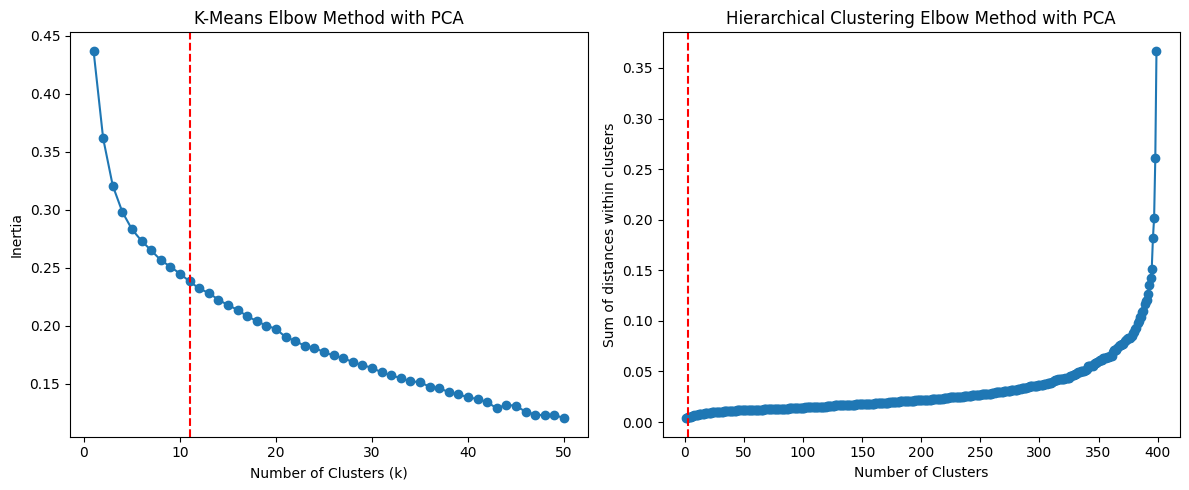

Optimal number of clusters with PCA (K-Means): 11
Optimal number of clusters with PCA (Hierarchical Clustering): 3
Optimal number of clusters without PCA (K-Means): 12
Optimal number of clusters without PCA (Hierarchical Clustering): 3


In [112]:
# Graficamos los resultados para ambos algoritmos con PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), inertia_values_pca, marker='o')
plt.axvline(x=KL_KMeans_pca.elbow, color='red', linestyle='--', label='Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Elbow Method with PCA')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(distances_pca) + 1), distances_pca, marker='o')
plt.axvline(x=optimal_clusters_pca, color='red', linestyle='--', label='Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of distances within clusters')
plt.title('Hierarchical Clustering Elbow Method with PCA')

plt.tight_layout()
plt.show()

print(f"Optimal number of clusters with PCA (K-Means): {KL_KMeans_pca.elbow}")
print(f"Optimal number of clusters with PCA (Hierarchical Clustering): {optimal_clusters_pca}")
print(f"Optimal number of clusters without PCA (K-Means): {KL_KMeans_no_pca.elbow}")
print(f"Optimal number of clusters without PCA (Hierarchical Clustering): {optimal_clusters_no_pca}")


5. Divida el dataset en training y testing set. 80% training y 20% test. Use el coeficiente de Silhouette para estimar los valores de los parámetros de DBSCAN aplicado al training set.



In [128]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Dividir el dataset en training y testing sets (80% training y 20% test)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, targets, test_size=0.2, random_state=42)

# Estimar los valores de los parámetros de DBSCAN usando el coeficiente de silhouette
best_eps = None
best_min_samples = None
best_silhouette_score = -1

# Ampliamos el rango de valores para eps y min_samples
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = [5, 10, 15, 20, 25]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(metric= "euclidean", eps=eps, min_samples=min_samples)
        labels = dbscan.fit(X_train)
        
        # Verificamos si hay al menos dos grupos distintos
        unique_labels = np.unique(labels)
        if len(unique_labels) > 1:
            # Calculamos el coeficiente de silhouette
            silhouette_avg = silhouette_score(X_train, labels)
            
            # Guardamos los mejores parámetros
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print("Mejores parámetros encontrados:")
print("Eps:", best_eps)
print("Min_samples:", best_min_samples)
print("Coeficiente de silhouette:", best_silhouette_score)


Mejores parámetros encontrados:
Eps: None
Min_samples: None
Coeficiente de silhouette: -1


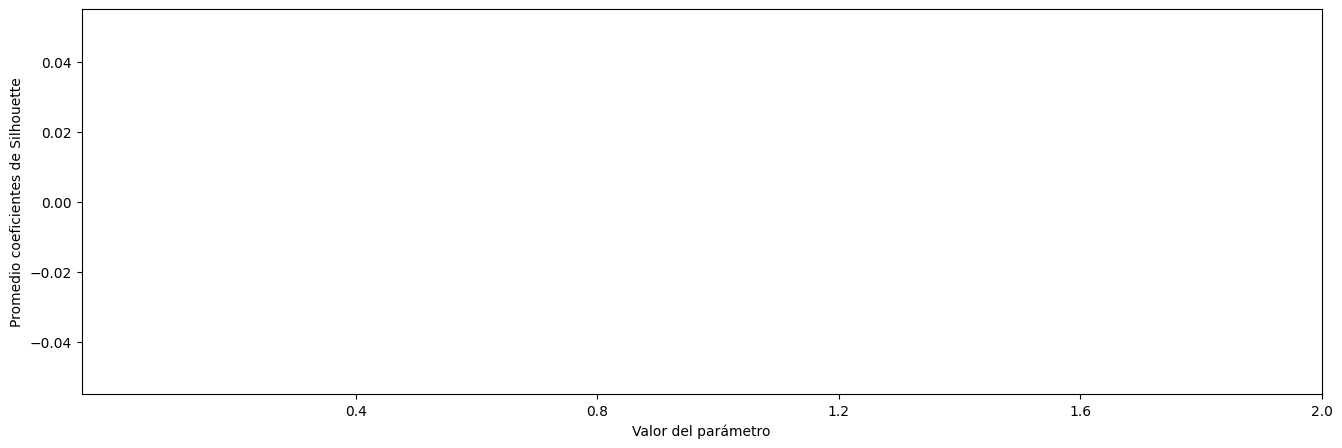

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Dividir el dataset en training y testing sets (80% training y 20% test)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, targets, test_size=0.2, random_state=42)

silhouette_coefficients = []

parametros = [0.4, 0.8, 1.2, 1.6, 2]

for n in parametros:
     clustering = DBSCAN(metric="euclidean",eps=n, min_samples=2).fit(X_train)
     
     unique_labels = len(set(clustering.labels_))
     if unique_labels > 1:
         score = silhouette_score(X_train, clustering.labels_)
         silhouette_coefficients.append(score)
     else:
         silhouette_coefficients.append(None)
     
fig, ax = plt.subplots(figsize=(16, 5))
ax.scatter(parametros, silhouette_coefficients)
ax.set_xticks(parametros)
ax.set_xlabel("Valor del parámetro")
ax.set_ylabel("Promedio coeficientes de Silhouette")
plt.show()


6. Con los valores estimados, aplique DBSCAN al training set y luego haga predicciones al testing set. Compare que tan bien estimo las etiquetas el algoritmo con respecto a las verdaderas etiquetas del testing set.

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
Adjusted Rand Index: 1.0


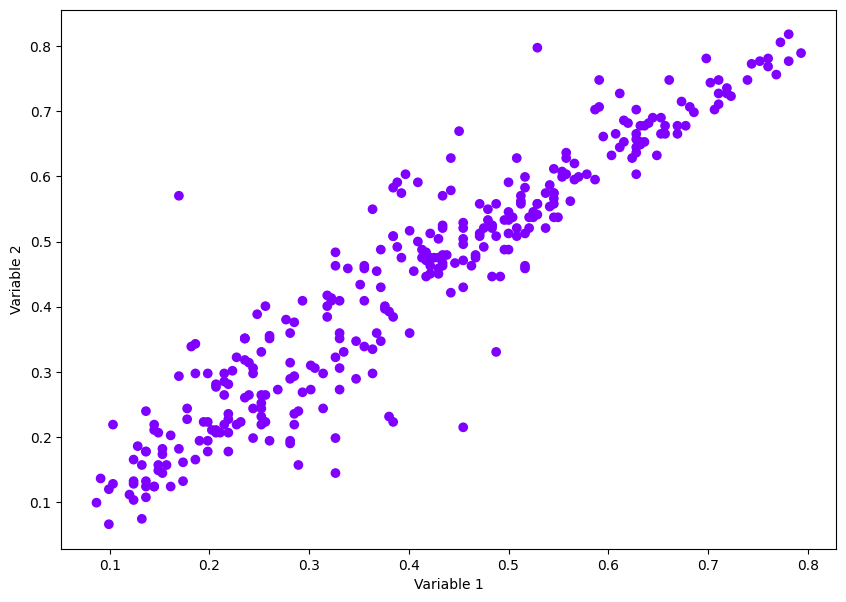

In [124]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, accuracy_score

# Convert the data to float and scale it to [0, 1] range (important for image data)
data_scaled = data.astype('float32') / 255.0

# Split the data into training and testing sets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Set the optimal DBSCAN parameters obtained previously
eps_optimal = 1
min_samples_optimal = 2

# Apply DBSCAN to the training set
clustering = DBSCAN(eps=1, min_samples=2).fit(X_train)
train_labels = clustering.labels_
print(train_labels)

# Predict labels for the testing set
test_labels = dbscan.fit_predict(X_test)

# Calculate adjusted Rand Index and accuracy
adjusted_rand_index = adjusted_rand_score(np.zeros(len(X_test)), test_labels)  # All points are considered as noise
accuracy = accuracy_score(np.ones(len(X_test)), test_labels == -1)  # Count the correctly classified noise points as 1

print(f"Adjusted Rand Index: {adjusted_rand_index}")
print(f"Accuracy (for noise points): {accuracy}")
# Graficamos los puntos. Cada color es un cluster distinto.
plt.figure(figsize=(10, 7))
plt.scatter(X_train[:,0], X_train[:,1], c=train_labels, cmap='rainbow')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()



Considerando lo aprendido en este módulo, implemente lo que Ud. crea necesario para mejorar los resultados del problema de decoding visto en clases 
